In [1]:
import pycisTopic
import pickle
import pandas as pd
import os
from collections import Counter
import numpy as np

In [2]:
from pycisTopic.clust_vis import (
    find_clusters,
    run_umap,
    run_tsne,
    plot_metadata,
    plot_topic,
    cell_topic_heatmap
)

In [3]:
%%time
out_dir = "pycistopic_outs/"
cto_infile = open(out_dir + 'cisTopicObject.pkl', 'rb')
cistopic_obj = pickle.load(cto_infile)
cto_infile.close()

CPU times: user 1.39 s, sys: 4.92 s, total: 6.31 s
Wall time: 7.77 s


In [4]:
cistopic_obj.cell_data

,cisTopic_log_nr_frag,cisTopic_log_nr_acc,cisTopic_nr_frag,cisTopic_nr_acc,ATAC_barcode,sample_id,leiden,donor_id,study,age_status,...,tsse,cell_type,tech_plus_study,age_group,decade,final_cell_type,cell_or_nuclei,disease,disease_and_age_status,group
ENCSR185NXG:AGACTCAACGGTTTAG___cisTopic,3.788734,3.769156,6148,5877,ENCSR185NXG:AGACTCAACGGTTTAG,ENCSR185NXG,1,ENCODE v4 (Snyder):ENCSR067BOK,ENCODE v4 (Snyder),postnatal,...,5,Cardiomyocyte,Multiome-v1_ENCODE v4 (Snyder),middle,5.0,Cardiomyocyte,Nuclei,ND,N:postnatal,N:postnatal_Cardiomyocyte
ENCSR511VYN:GACACCTTGTTTCGGA___cisTopic,3.717421,3.696007,5217,4966,ENCSR511VYN:GACACCTTGTTTCGGA,ENCSR511VYN,1,ENCODE v4 (Snyder):ENCSR398YBK,ENCODE v4 (Snyder),postnatal,...,5,Cardiomyocyte,Multiome-v1_ENCODE v4 (Snyder),middle,4.0,Cardiomyocyte,Nuclei,ND,N:postnatal,N:postnatal_Cardiomyocyte
ENCSR627IOJ:GATTTGAGACACCTTG___cisTopic,3.49955,3.489958,3159,3090,ENCSR627IOJ:GATTTGAGACACCTTG,ENCSR627IOJ,0,ENCODE v4 (Snyder):ENCSR630LZS,ENCODE v4 (Snyder),postnatal,...,5,Cardiomyocyte,Multiome-v1_ENCODE v4 (Snyder),middle,4.0,Cardiomyocyte,Nuclei,ND,N:postnatal,N:postnatal_Cardiomyocyte
ENCSR406CJH:CGATTAAACACGCGGT___cisTopic,3.270213,3.263636,1863,1835,ENCSR406CJH:CGATTAAACACGCGGT,ENCSR406CJH,1,ENCODE v4 (Snyder):ENCSR328GTN,ENCODE v4 (Snyder),postnatal,...,5,Cardiomyocyte,Multiome-v1_ENCODE v4 (Snyder),old,6.0,Cardiomyocyte,Nuclei,ND,N:postnatal,N:postnatal_Cardiomyocyte
HCAHeartST10773165_HCAHeartST10781062:GACTTACAGTGAGCAA-1___cisTopic,3.663701,3.643551,4610,4401,HCAHeartST10773165_HCAHeartST10781062:GACTTACA...,HCAHeartST10773165_HCAHeartST10781062,1,Kanemaru 2023:AH1-Nuclei_Multiome-v1,Kanemaru 2023,postnatal,...,5,Cardiomyocyte,Multiome-v1_Kanemaru 2023,middle,4.0,Cardiomyocyte,Nuclei,ND,N:postnatal,N:postnatal_Cardiomyocyte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10X_ATAC_CK382:GCCTACTGTTCAGTAC-1___cisTopic,3.862191,3.783904,7281,6080,10X_ATAC_CK382:GCCTACTGTTCAGTAC-1,10X_ATAC_CK382,3,Kuppe 2022:P20,Kuppe 2022,postnatal,...,5,Lymphoid,10X_ATAC_Kuppe 2022,old,6.0,Lymphoid,Nuclei,AMI,Y:postnatal,Y:postnatal_Lymphoid
10X_ATAC_CK173:GCTGAGCTCTCGGCGA-1___cisTopic,3.552547,3.512151,3569,3252,10X_ATAC_CK173:GCTGAGCTCTCGGCGA-1,10X_ATAC_CK173,3,Kuppe 2022:P3,Kuppe 2022,postnatal,...,5,Lymphoid,10X_ATAC_Kuppe 2022,middle,5.0,Lymphoid,Nuclei,AMI,Y:postnatal,Y:postnatal_Lymphoid
10X_ATAC_CK343:CTTGAAGAGTGTCGGA-1___cisTopic,3.798582,3.750663,6289,5632,10X_ATAC_CK343:CTTGAAGAGTGTCGGA-1,10X_ATAC_CK343,3,Kuppe 2022:P9,Kuppe 2022,postnatal,...,5,Lymphoid,10X_ATAC_Kuppe 2022,middle,5.0,Lymphoid,Nuclei,AMI,Y:postnatal,Y:postnatal_Lymphoid
10X_ATAC_CK380:TAAACCGCAAGGGTAC-1___cisTopic,3.722963,3.676511,5284,4748,10X_ATAC_CK380:TAAACCGCAAGGGTAC-1,10X_ATAC_CK380,3,Kuppe 2022:P11,Kuppe 2022,postnatal,...,5,Lymphoid,10X_ATAC_Kuppe 2022,old,6.0,Lymphoid,Nuclei,AMI,Y:postnatal,Y:postnatal_Lymphoid


### Update the cell data to include the disease and age status

In [5]:
cistopic_obj.cell_data['disease_binary']

ENCSR185NXG:AGACTCAACGGTTTAG___cisTopic                                N
ENCSR511VYN:GACACCTTGTTTCGGA___cisTopic                                N
ENCSR627IOJ:GATTTGAGACACCTTG___cisTopic                                N
ENCSR406CJH:CGATTAAACACGCGGT___cisTopic                                N
HCAHeartST10773165_HCAHeartST10781062:GACTTACAGTGAGCAA-1___cisTopic    N
                                                                      ..
10X_ATAC_CK382:GCCTACTGTTCAGTAC-1___cisTopic                           Y
10X_ATAC_CK173:GCTGAGCTCTCGGCGA-1___cisTopic                           Y
10X_ATAC_CK343:CTTGAAGAGTGTCGGA-1___cisTopic                           Y
10X_ATAC_CK380:TAAACCGCAAGGGTAC-1___cisTopic                           Y
10X_ATAC_CK350:CCTGCTAGTCATAAGA-1___cisTopic                           Y
Name: disease_binary, Length: 13500, dtype: object

In [6]:
cistopic_obj.cell_data['updated_cell_type'] = ( cistopic_obj.cell_data['cell_type'].astype(str) + ":" + 
                                       cistopic_obj.cell_data['disease_binary'].astype(str) + ":" +
                                      cistopic_obj.cell_data['age_status'].astype(str)  )

In [20]:
cistopic_obj.cell_data['age_disease_status'] = ( cistopic_obj.cell_data['disease_binary'].astype(str) + ":" +
                                      cistopic_obj.cell_data['age_status'].astype(str)  )

In [7]:
Counter(cistopic_obj.cell_data['updated_cell_type'])

Counter({'Cardiomyocyte:N:postnatal': 750,
         'Cardiomyocyte:N:fetal': 750,
         'Cardiomyocyte:Y:postnatal': 750,
         'Endothelial:N:postnatal': 750,
         'Endothelial:N:fetal': 750,
         'Endothelial:Y:postnatal': 750,
         'Fibroblast:N:postnatal': 750,
         'Pericyte:N:postnatal': 750,
         'Fibroblast:N:fetal': 750,
         'Pericyte:N:fetal': 750,
         'Fibroblast:Y:postnatal': 750,
         'Pericyte:Y:postnatal': 750,
         'Myeloid:N:postnatal': 750,
         'Myeloid:N:fetal': 750,
         'Myeloid:Y:postnatal': 750,
         'Lymphoid:N:postnatal': 750,
         'Lymphoid:N:fetal': 750,
         'Lymphoid:Y:postnatal': 750})

In [8]:
updated_cistopic_path = "pycistopic_outs/updated_cistopic_obj.pkl"

with open(updated_cistopic_path, 'wb') as file:
    pickle.dump(cistopic_obj, file)

In [9]:
%%time
# Load imputed accessibility
infile = open(out_dir + 'DARs/Imputed_accessibility.pkl', 'rb')
imputed_acc_obj = pickle.load(infile)
infile.close()

CPU times: user 0 ns, sys: 1min 8s, total: 1min 8s
Wall time: 1min 15s


In [10]:
%%time
# Load marker genes
infile = open(out_dir + 'DAGs/DAGs.pkl', 'rb')
markers_dict = pickle.load(infile)
infile.close()

CPU times: user 0 ns, sys: 12.5 ms, total: 12.5 ms
Wall time: 50.3 ms


In [11]:
markers_dict

{'Cardiomyocyte':              Log2FC  Adjusted_pval       Contrast
 KRTAP1-1  39.940819   0.000000e+00  Cardiomyocyte
 KRTAP1-3  39.940819   0.000000e+00  Cardiomyocyte
 KRTAP2-1  39.001175   0.000000e+00  Cardiomyocyte
 C1orf158  35.097434   3.078925e-07  Cardiomyocyte
 PRAMEF11  33.888409   4.690679e-02  Cardiomyocyte
 ...             ...            ...            ...
 ESRP1      0.586569   0.000000e+00  Cardiomyocyte
 GJB7       0.586431   0.000000e+00  Cardiomyocyte
 CLASP1     0.586394   0.000000e+00  Cardiomyocyte
 LATS1      0.585970   0.000000e+00  Cardiomyocyte
 SHLD1      0.585778  4.652404e-238  Cardiomyocyte
 
 [2617 rows x 3 columns],
 'Endothelial':            Log2FC  Adjusted_pval     Contrast
 ZNF705D  9.480357  2.013245e-242  Endothelial
 USP17L7  9.480357  2.013245e-242  Endothelial
 OR1L3    8.337673   6.272277e-56  Endothelial
 MAGEB6   7.879792   0.000000e+00  Endothelial
 SSX5     7.785386   0.000000e+00  Endothelial
 ...           ...            ...          ...

In [12]:
# view example for marker genes for a cell type
markers_dict['Myeloid'].sort_values(by = "Adjusted_pval")[1:50]

,Log2FC,Adjusted_pval,Contrast
IQGAP3,0.868087,0.0,Myeloid
SRMS,0.867359,0.0,Myeloid
ABHD12B,0.866875,0.0,Myeloid
TBC1D7,0.865793,0.0,Myeloid
S1PR4,0.863333,0.0,Myeloid
SLC12A5,0.862801,0.0,Myeloid
TIMP1,0.862671,0.0,Myeloid
SERPINB8,0.862522,0.0,Myeloid
ARHGEF10L,0.868554,0.0,Myeloid
OR1A2,0.859484,0.0,Myeloid


In [15]:
find_clusters(
    cistopic_obj,
    target  = 'cell',
    k = 10,
    res = [0.6, 1.2, 3],
    prefix = 'pycisTopic_',
    scale = True,
    split_pattern = '-'
)

2025-01-13 00:22:26,259 cisTopic     INFO     Finding neighbours


In [16]:
run_umap(
    cistopic_obj,
    target  = 'cell', scale=True)

2025-01-13 00:22:40,782 cisTopic     INFO     Running UMAP


/home/william/anaconda3/envs/scenicplus/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


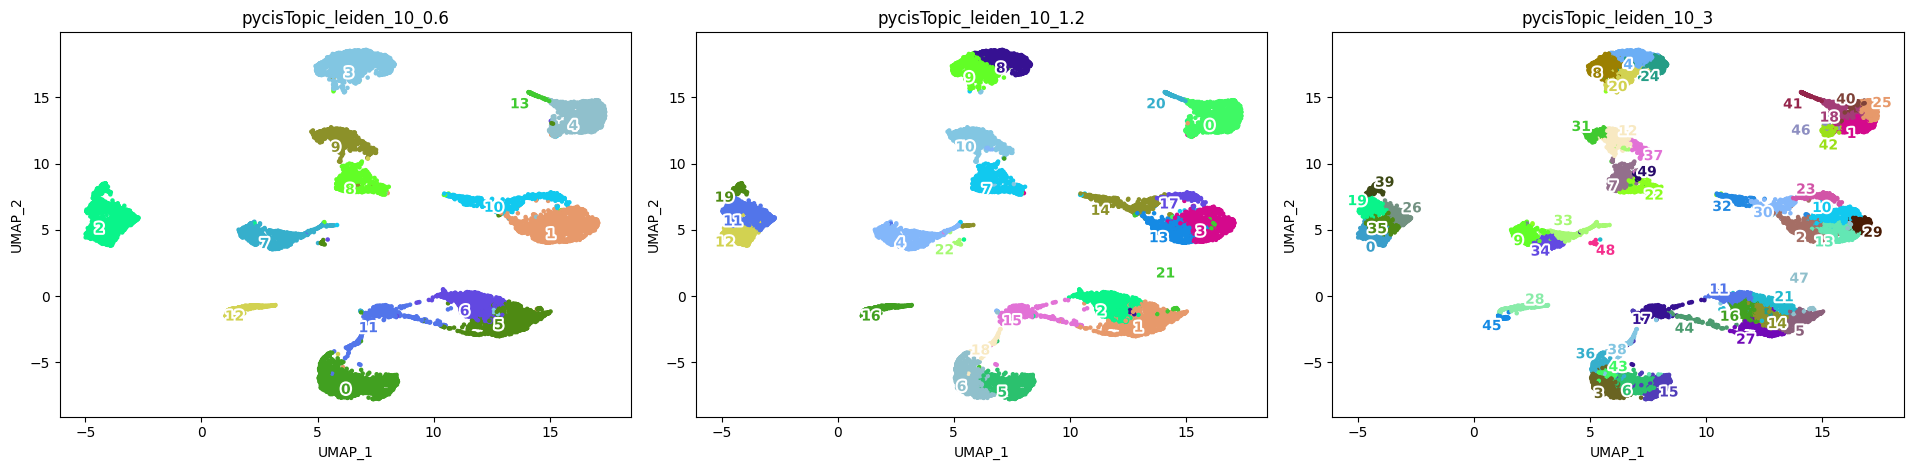

In [17]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2', 'pycisTopic_leiden_10_3'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

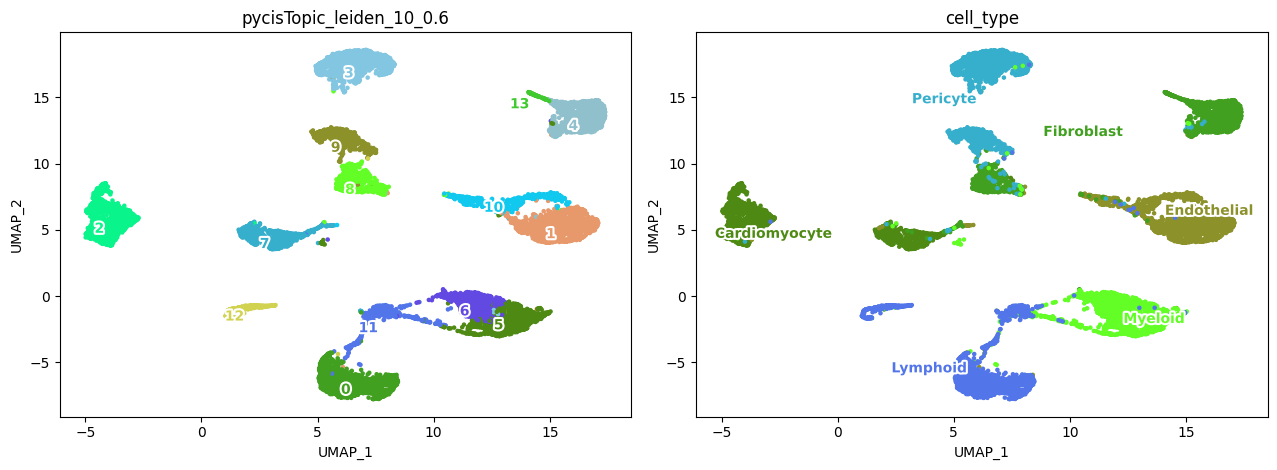

In [18]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['pycisTopic_leiden_10_0.6', 'cell_type'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)

### Plot by the age and disease status

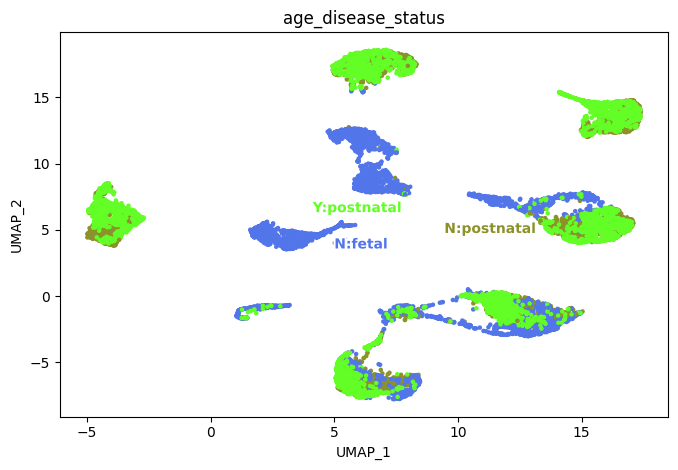

In [21]:
plot_metadata(
    cistopic_obj,
    reduction_name='UMAP',
    variables=['age_disease_status'],
    target='cell', num_columns=4,
    text_size=10,
    dot_size=5)